In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,123):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(4305, 100, 100, 3)

In [44]:
Xtest.shape

(246, 100, 100, 3)

In [45]:
ytrain.shape

(4305,)

In [46]:
ytest.shape

(246,)

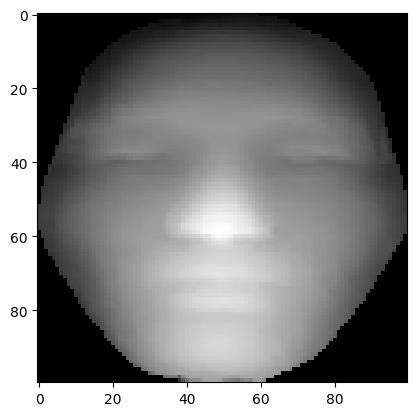

In [47]:
plt.imshow(Xtrain[4304])

In [48]:
ytrain[4304]

122

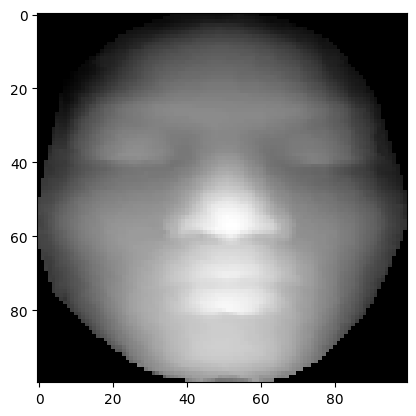

In [49]:
plt.imshow(Xtrain[245])

In [50]:
ytest[245]

122

In [72]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import ResNet50V2

In [109]:
base_model=ResNet50V2(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [110]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [111]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(123,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 flatten_23 (Flatten)        (None, 32768)             0         
                                                                 
 dense_46 (Dense)            (None, 250)               8192250   
                                                                 
 dense_47 (Dense)            (None, 123)               30873     
                                                                 
Total params: 31787923 (121.26 MB)
Trainable params: 11639187 (44.40 MB)
Non-trainable params: 20148736 (76.86 MB)
_________________________________________________________________


In [112]:
model.fit(Xtrain,ytrain,epochs=10,validation_data=(Xtest,ytest))

Epoch 1/10
135/135 [==============================] - 264s 2s/step - loss: 3.6324 - accuracy: 0.2283 - val_loss: 2.8444 - val_accuracy: 0.4675
Epoch 2/10
135/135 [==============================] - 238s 2s/step - loss: 1.7647 - accuracy: 0.5712 - val_loss: 1.0649 - val_accuracy: 0.7439
Epoch 3/10
135/135 [==============================] - 236s 2s/step - loss: 0.9054 - accuracy: 0.7640 - val_loss: 1.0480 - val_accuracy: 0.7561
Epoch 4/10
135/135 [==============================] - 237s 2s/step - loss: 0.4130 - accuracy: 0.8880 - val_loss: 0.6408 - val_accuracy: 0.8618
Epoch 5/10
135/135 [==============================] - 230s 2s/step - loss: 0.2376 - accuracy: 0.9333 - val_loss: 0.5304 - val_accuracy: 0.8862
Epoch 6/10
135/135 [==============================] - 228s 2s/step - loss: 0.1738 - accuracy: 0.9512 - val_loss: 0.5631 - val_accuracy: 0.8862
Epoch 7/10
135/135 [==============================] - 227s 2s/step - loss: 0.1529 - accuracy: 0.9603 - val_loss: 0.4055 - val_accuracy: 0.9024

In [114]:
yprob=model.predict(Xtest)
yprob.shape

8/8 [==============================] - 9s 1s/step


(246, 123)

In [115]:
ypred=yprob.argmax(axis=1)
ypred.shape

(246,)

In [116]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      0.50      0.67         2
          14       1.00      0.50      0.67         2
          15       0.40      1.00      0.57         2
          16       1.00      1.00      1.00         2
          17       1.00    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

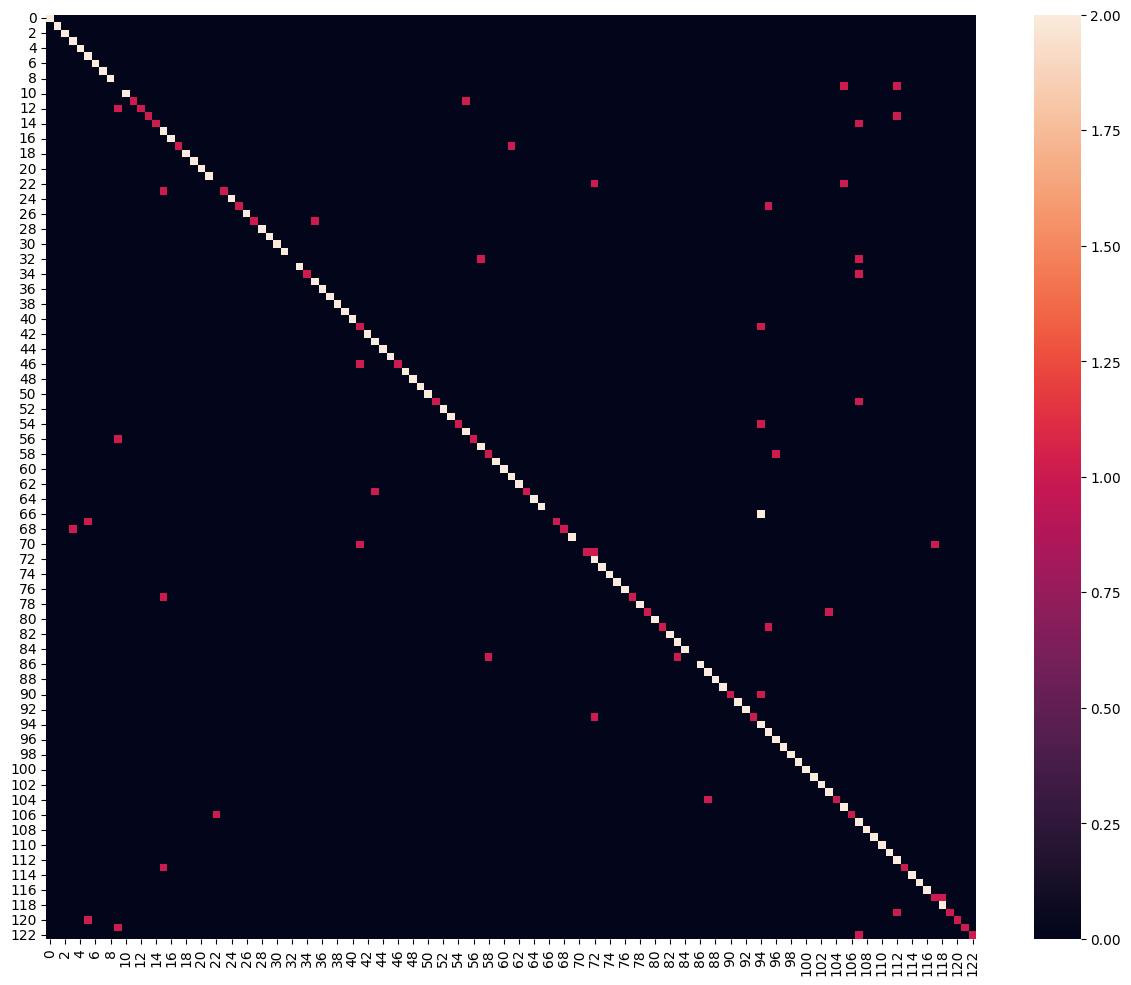

In [117]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()